In [11]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [12]:
pred_cefta = np.load("results/cv/cv_pred__Ceftazidim.npy")
pred_cipro = np.load("results/cv/cv_pred__Ciprofloxacin.npy")
pred_colis = np.load("results/cv/cv_pred__Colistin.npy")
pred_merop = np.load("results/cv/cv_pred__Meropenem.npy")
pred_tobra = np.load("results/cv/cv_pred__Tobramycin.npy")

In [13]:
with open("dataset.pkl", "rb") as f:
    DATA = pickle.load(f)
    pheno = DATA["pheno"]

In [14]:
true_cefta = pheno.iloc[:, 2].dropna().to_numpy()
true_cipro = pheno.iloc[:, 3].dropna().to_numpy()
true_colis = pheno.iloc[:, 5].dropna().to_numpy()
true_merop = pheno.iloc[:, 4].dropna().to_numpy()
true_tobra = pheno.iloc[:, 1].dropna().to_numpy()

In [15]:
balanced_accuracy_score(true_cefta, pred_cefta)

0.8353415814954277

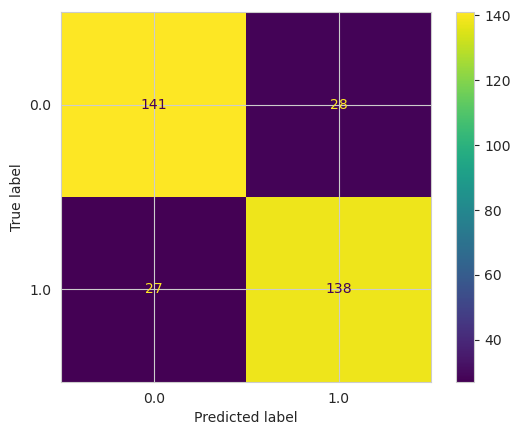

In [16]:
ConfusionMatrixDisplay.from_predictions(true_cefta, pred_cefta)

In [17]:
balanced_accuracy_score(true_cipro, (pred_cipro >= .5).astype(int))

0.8830789165955564

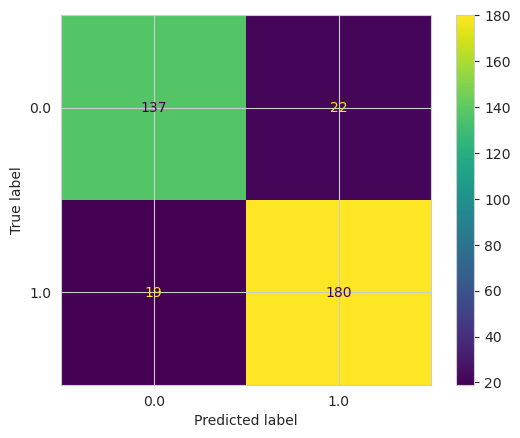

In [18]:
ConfusionMatrixDisplay.from_predictions(true_cipro, (pred_cipro >= .5).astype(int))

In [19]:
balanced_accuracy_score(true_colis, pred_colis)

0.7976399070266404

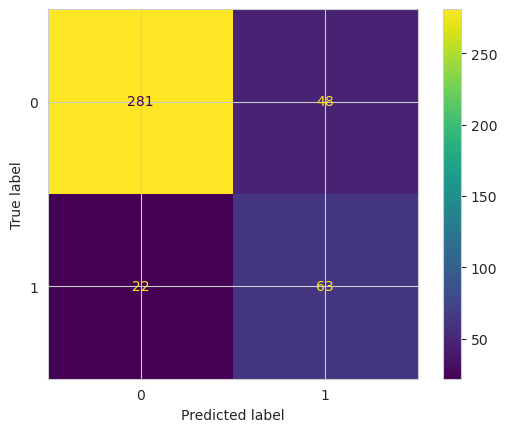

In [20]:
ConfusionMatrixDisplay.from_predictions(true_colis, pred_colis)
plt.savefig("rapport/images/conf_mat_colis.png", dpi=300, bbox_inches="tight")

In [21]:
balanced_accuracy_score(true_merop, (pred_merop >= .5).astype(int))

0.897876304023845

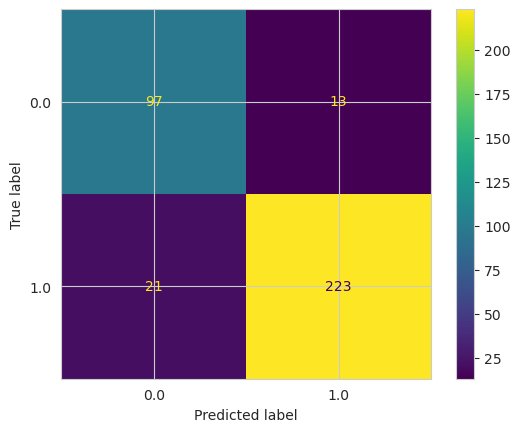

In [22]:
ConfusionMatrixDisplay.from_predictions(true_merop, (pred_merop >= .5).astype(int))
plt.savefig("rapport/images/conf_mat_merop.png", dpi=300, bbox_inches="tight")

In [23]:
balanced_accuracy_score(true_tobra, pred_tobra)

0.950891861761427

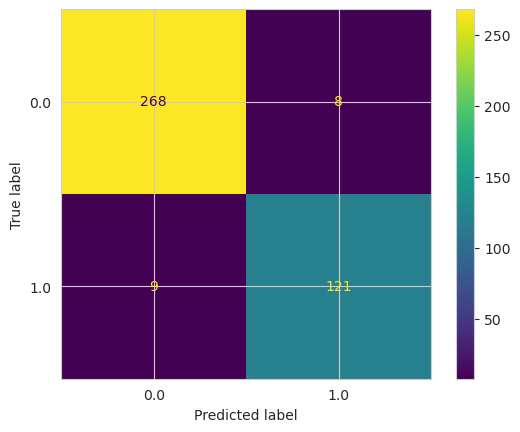

In [24]:
ConfusionMatrixDisplay.from_predictions(true_tobra, pred_tobra)

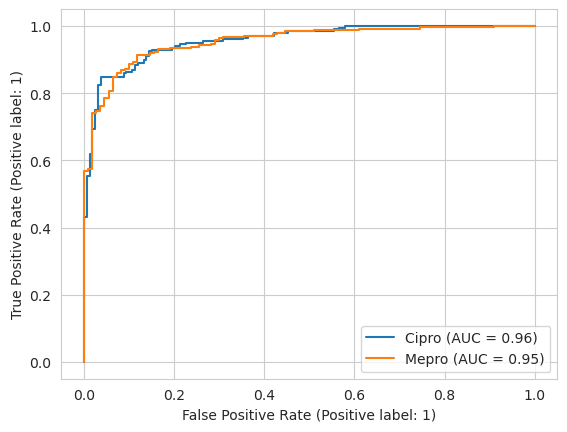

In [25]:
ax = RocCurveDisplay.from_predictions(true_cipro, pred_cipro, name="Cipro").ax_
RocCurveDisplay.from_predictions(true_merop, pred_merop, ax=ax, name="Mepro")